In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [43]:
##Load the Data

In [44]:
data = pd.read_csv('real_estate_price_size.csv')
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [45]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [46]:
y = data['price']
x = data['size']

In [47]:
x.shape

(100,)

In [48]:
y.shape

(100,)

In [49]:
##Shape is in the form of 1D array so we have to change it into matrix format because sklearn will take matrix as input

In [50]:
x_matrix = x.values.reshape(-1,1)

In [51]:
x_matrix.shape

(100, 1)

In [52]:
#Now shape is changed for x

In [53]:
#Performing the linear regression now

In [54]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [55]:
reg.score(x_matrix,y)

0.7447391865847587

In [56]:
reg.coef_

array([223.17874259])

In [57]:
reg.intercept_

101912.60180122912

In [58]:
#Now plotting the regression line

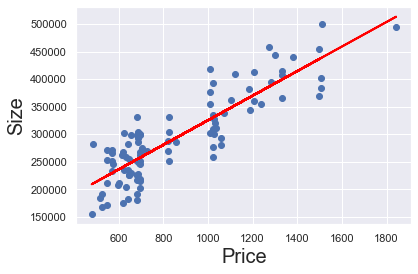

In [59]:
plt.scatter(x,y)
yhat = reg.intercept_ + reg.coef_ * x_matrix
fig = plt.plot(x, yhat, lw = 2, c = 'red', label = 'Regression Line')
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Size', fontsize = 20)
plt.show()

In [60]:
#Now predicting the values - for 1200 size house

In [61]:
reg.predict([[1200]])

array([369727.09291476])

In [62]:
#Now predicting the values - for 1200, 1100, 900, 700 size house

In [64]:
reg.predict([[1200],[1100],[900],[700]])

array([369727.09291476, 347409.2186553 , 302773.47013638, 258137.72161745])

##Multiple Linear Regression Model

In [67]:
data = pd.read_csv('real_estate_price_size_year.csv')
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [68]:
x = data[['size','year']]
y = data['price']

In [69]:
x.shape

(100, 2)

In [70]:
#Here we don't have to reshape it because it is not necessary it is already a 2D array

Performing Regression

In [71]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

Coefficients

In [72]:
reg.coef_

array([ 227.70085401, 2916.78532684])

Intercept

In [73]:
reg.intercept_

-5772267.017463281

In [74]:
#Calculation of Adjusted R_square because we don't have any method for that

Adjusted R_Square
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [76]:
r2 = reg.score(x,y)

In [77]:
r2

0.7764803683276791

In [78]:
x.shape

(100, 2)

In [79]:
n = x.shape[0]
p = x.shape[1]

In [82]:
adj_R_square = 1 - (1 - r2)*((n-1)/(n-p-1))

In [83]:
adj_R_square

0.7718717161282498

## P- values Calculation using Feature Selection

In [84]:
from sklearn.feature_selection import f_regression

In [85]:
f_regression(x,y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [86]:
#Here first array shows f-values or f-statistics and second array shows p-values

In [87]:
p_values = f_regression(x,y)[1]

In [88]:
p_values

array([8.12763222e-31, 3.57340758e-01])

In [89]:
#Round the p-values upto 3 digits

In [90]:
p_values.round(3)

array([0.   , 0.357])

In [91]:
#Here the first entry in array shows almost 0 p-value for size and 0.357 p-value for year

In [92]:
#Here p-values shows we have to remove year variable but statsmodel summary shows a different result of p-values = 0 for year

## Creating a summary table for sklearn

In [95]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])

In [96]:
reg_summary

,Features
0,size
1,year


In [97]:
reg_summary['Coefficients'] = reg.coef_

In [98]:
reg_summary['p-values'] = p_values.round(3)

In [99]:
reg_summary

,Features,Coefficients,p-values
0,size,227.700854,0.000
1,year,2916.785327,0.357


## Standardization 

In [100]:
#Declare dependent and independent variable

In [102]:
x = data[['size','year']]
y = data['price']

In [103]:
x

,size,year
0,643.09,2015
1,656.22,2009
2,487.29,2018
3,1504.75,2015
4,1275.46,2009
...,...,...
95,549.80,2009
96,1037.44,2009
97,1504.75,2006
98,648.29,2015


Standardization Process

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

In [106]:
scaler.fit(x)

StandardScaler()

In [108]:
x_scaled = scaler.transform(x)

In [112]:
x_scaled

array([[-0.70816415,  0.51006137],
       [-0.66387316, -0.76509206],
       [-1.23371919,  1.14763808],
       [ 2.19844528,  0.51006137],
       [ 1.42498884, -0.76509206],
       [-0.937209  , -1.40266877],
       [-0.95171405,  0.51006137],
       [-0.78328682, -1.40266877],
       [-0.57603328,  1.14763808],
       [-0.53467702, -0.76509206],
       [ 0.69939906, -0.76509206],
       [ 3.33780001, -0.76509206],
       [-0.53467702,  0.51006137],
       [ 0.52699137,  1.14763808],
       [ 1.51100715, -1.40266877],
       [ 1.77668568, -1.40266877],
       [-0.54810263,  1.14763808],
       [-0.77276222, -1.40266877],
       [-0.58004747, -1.40266877],
       [ 0.58943055,  1.14763808],
       [-0.78365788,  0.51006137],
       [-1.02322731,  0.51006137],
       [ 1.19557293,  0.51006137],
       [-1.12884431,  0.51006137],
       [-1.10378093, -0.76509206],
       [ 0.84424715,  1.14763808],
       [-0.95171405,  1.14763808],
       [ 1.62279723,  0.51006137],
       [-0.58004747,

## Regression with Scaled Features

In [113]:
reg = LinearRegression()

In [115]:
reg.fit(x_scaled,y)

LinearRegression()

In [116]:
reg.coef_

array([67501.57614152, 13724.39708231])

In [117]:
reg.intercept_

292289.4701599997

## Creating a summary table

In [120]:
reg_summary = pd.DataFrame([['Intercept'],['Size'],['Year']],columns = ['Features'])

In [121]:
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [122]:
reg_summary

,Features,Weights
0,Intercept,292289.470160
1,Size,67501.576142
2,Year,13724.397082


In [123]:
# the coefficient of the standardized year (Weight) is 13724.39 which is far from 0 and therefore it has a good amount of impact